# Exploratory Data Analysis (EDA)

Learning objectives
- Compute descriptive statistics and interpret them (mean, median, IQR, skew).
- Visualize distributions with histograms, KDEs, boxplots, and violin plots.
- Explore pairwise relationships: scatterplots, regression fits, pairplots.
- Compute and visualize correlation matrices (Pearson, Spearman).
- Use groupby to summarize categorical patterns and produce pivot/heatmap views.
- Detect skew and outliers and apply simple transforms (log1p).
- Compare Seaborn and Matplotlib usage and learn how to combine them.

### Matplotlib vs Seaborn — concise comparison

- Purpose
  - **Matplotlib**: Low‑level plotting library that gives fine control over figures, axes, annotations, and layout. Use when you need custom, publication‑quality plots or complex figure composition.
  - **Seaborn**: High‑level statistical visualization built on Matplotlib. Offers concise functions and sensible defaults for common EDA tasks (distribution plots, categorical plots, regression, heatmaps).

- When to use
  - Use **Seaborn** for fast, attractive EDA with minimal code.
  - Use **Matplotlib** for precise control, custom annotations, multi-panel layouts, or when building bespoke graphics.

- Interoperability
  - Seaborn returns Matplotlib axes/figures; you can call Matplotlib functions to tweak Seaborn plots (labels, lines, annotations).
  - Start with Seaborn for exploration, then switch to Matplotlib calls to finalize a figure.




In [1]:
# Environment check & imports
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", rc={"figure.figsize": (9,5)})
pd.options.display.float_format = "{:,.2f}".format

print("Python", sys.version.split()[0], "pandas", pd.__version__, "numpy", np.__version__)


Python 3.12.12 pandas 2.2.2 numpy 2.0.2


In [2]:
# Load tips dataset
import seaborn as sns
tips = sns.load_dataset("tips")
print("tips shape:", tips.shape)
display(tips.head())


tips shape: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1 — Descriptive statistics
Compute numeric summaries and inspect distributions. Look at counts, mean, std, percentiles, and missing values. For categoricals, inspect unique counts and top categories.


In [ ]:
# Numeric summary
display(tips.describe().T)

# Missing values and unique counts
print("Missing values:\n", tips.isna().sum())
print("\nCategorical value counts (top):")
for c in tips.select_dtypes(include="category").columns:
    print(f"\n{c} value_counts:\n", tips[c].value_counts())


,count,mean,std,min,25%,50%,75%,max
total_bill,244.00,19.79,8.90,3.07,13.35,17.80,24.13,50.81
tip,244.00,3.00,1.38,1.00,2.00,2.90,3.56,10.00
size,244.00,2.57,0.95,1.00,2.00,2.00,3.00,6.00


Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Categorical value counts (top):

sex value_counts:
 sex
Male      157
Female     87
Name: count, dtype: int64

smoker value_counts:
 smoker
No     151
Yes     93
Name: count, dtype: int64

day value_counts:
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time value_counts:
 time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 2 — Distribution plots (histogram, KDE, boxplot, violin)
- Histogram + KDE: view shape and multimodality  
- Boxplot: median, IQR, outliers  
- Violin: density shape + quartiles per category


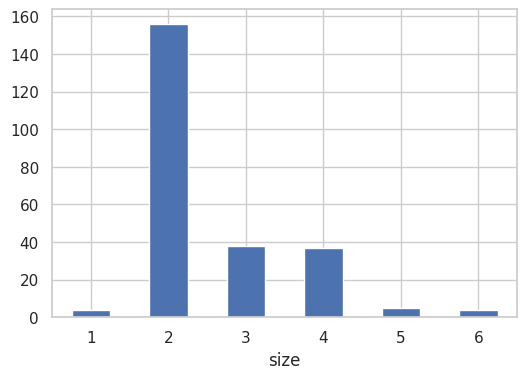

In [ ]:
tips['size'].value_counts().sort_index().plot(kind='bar', figsize=(6, 4))
plt.xticks(rotation=0);

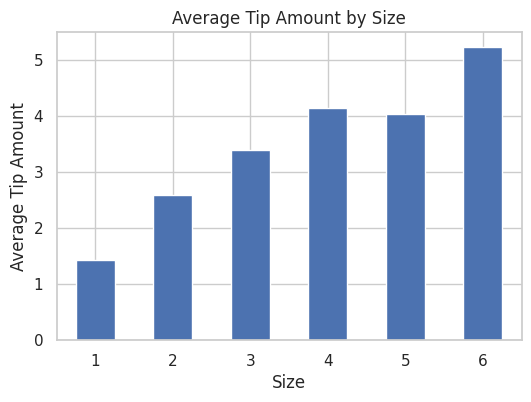

In [ ]:
tips.groupby('size')['tip'].mean().plot(kind='bar', figsize=(6, 4))
plt.xticks(rotation=0)
plt.xlabel('Size')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Size');

<Axes: xlabel='size', ylabel='tip'>

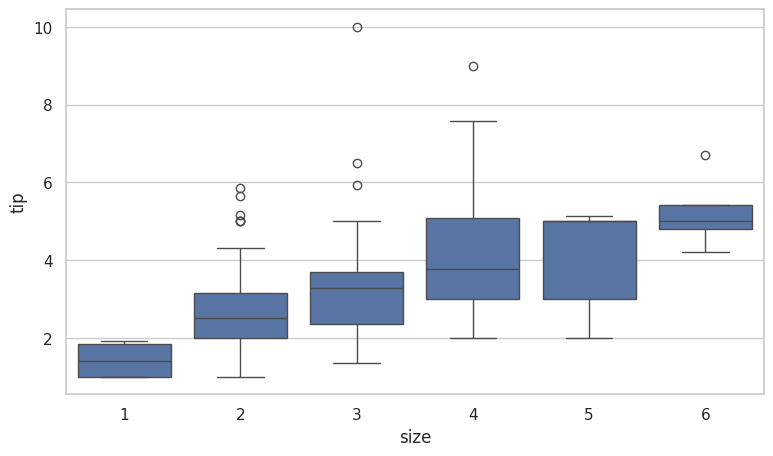

In [ ]:
sns.boxplot(data=tips, x="size", y="tip")

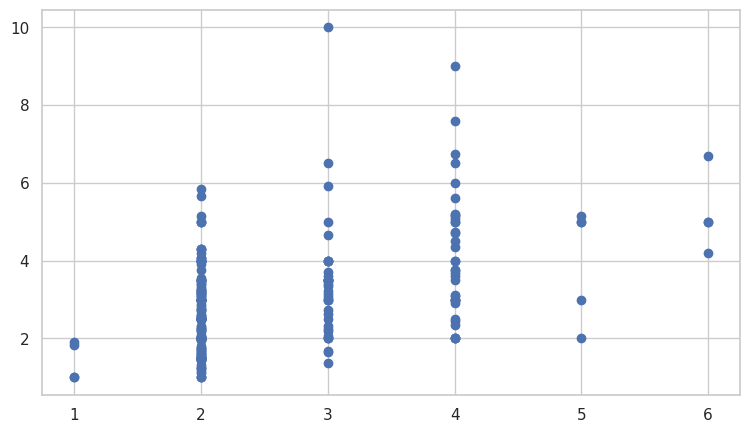

In [ ]:
plt.scatter(tips['size'], tips['tip'])

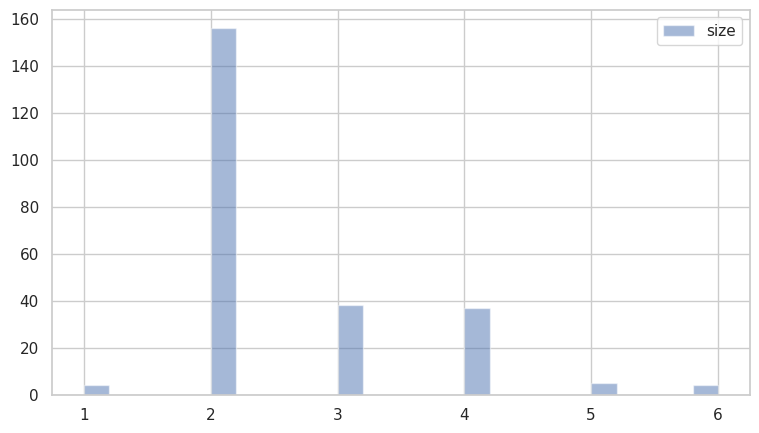

In [ ]:
# plot the histogram of tips and size on the same axes
#plt.hist(tips['tip'], bins=25, label='tip')
plt.hist(tips['size'], bins=25, label='size', alpha=0.5)
plt.legend();

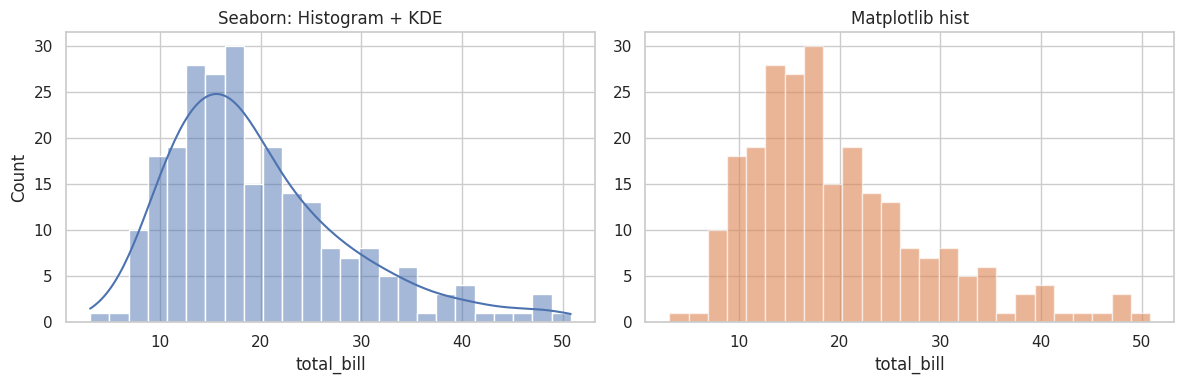

In [ ]:
# Histogram + KDE (Seaborn)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(tips["total_bill"], bins=25, kde=True, color='C0')
plt.title("Seaborn: Histogram + KDE")
plt.xlabel("total_bill")

# Matplotlib histogram with KDE overlay (mixing with seaborn kde for convenience)
plt.subplot(1,2,2)
plt.hist(tips["total_bill"], bins=25, color='C1', alpha=.6)
plt.title("Matplotlib hist")
plt.xlabel("total_bill")

plt.tight_layout()
plt.show()


In [ ]:
days = ['Thur', 'Fri', 'Sat', 'Sun']

['Fri', 'Sat', 'Sun', 'Thur']

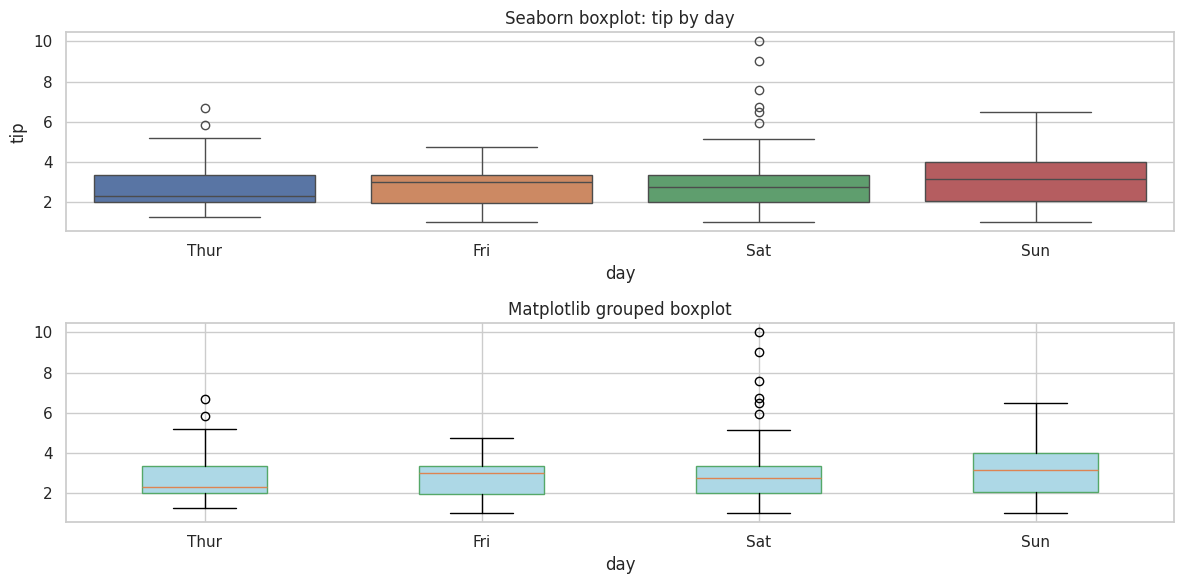

In [3]:
# Boxplot and Violin using Seaborn, and Matplotlib grouped boxplot
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
sns.boxplot(data=tips, x="day", y="tip", hue='day', legend=False)
plt.title("Seaborn boxplot: tip by day")

plt.subplot(2,1,2)
# Matplotlib grouped boxplot needs lists per group
#days = sorted(tips['day'].unique())
days = ['Thur', 'Fri', 'Sat', 'Sun']
groups = [tips.loc[tips['day'] == d, 'tip'].dropna().values for d in days]
plt.boxplot(groups, tick_labels=days, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='C2'))
plt.title("Matplotlib grouped boxplot")
plt.xlabel("day")

plt.tight_layout()
plt.show()

<Axes: ylabel='tip'>

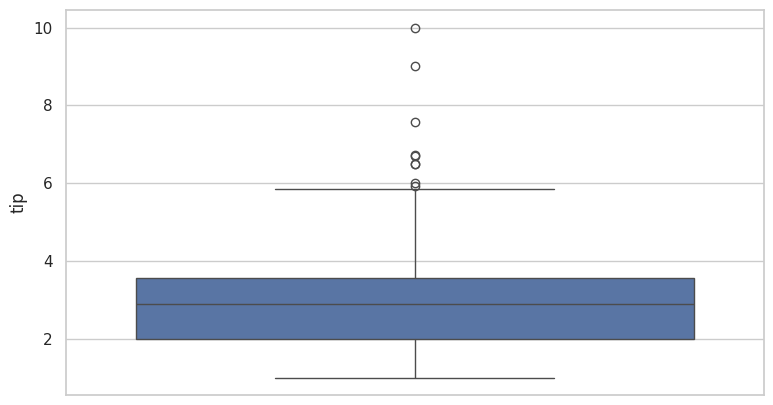

In [6]:
sns.boxplot(data=tips, y='tip')

<Axes: xlabel='tip', ylabel='Count'>

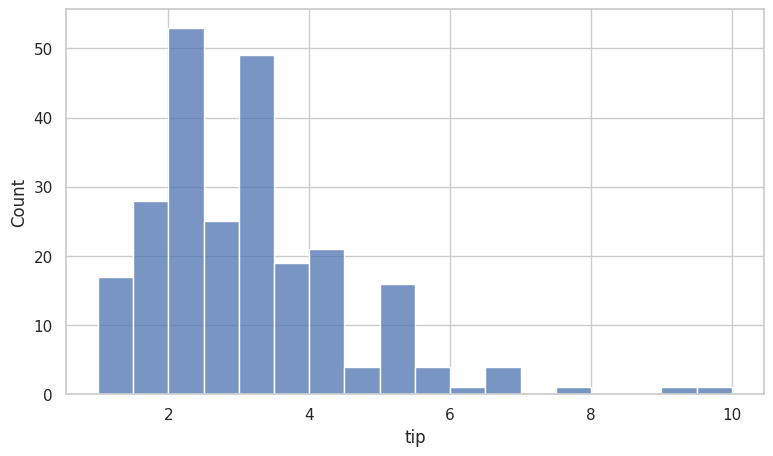

In [11]:
sns.histplot(data=tips, x='tip')

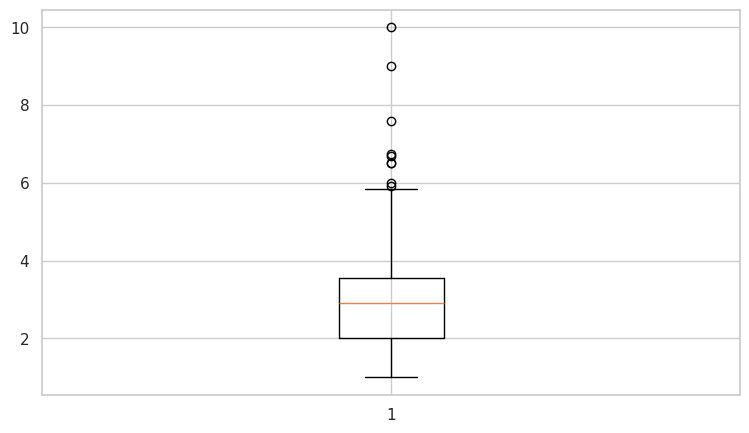

In [10]:
plt.boxplot(tips['tip']);

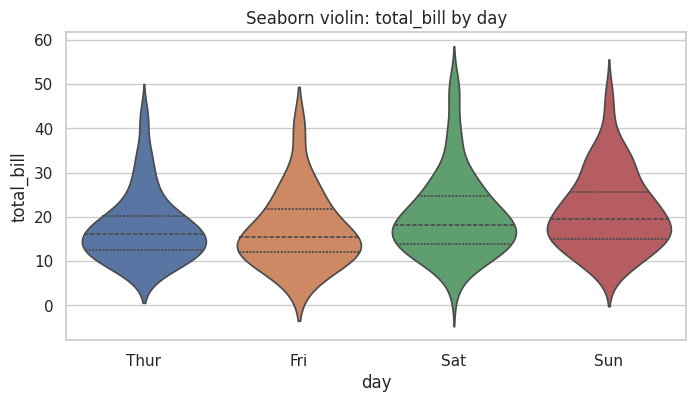

In [ ]:
# Violin plot (Seaborn)
plt.figure(figsize=(8,4))
sns.violinplot(data=tips, x="day", y="total_bill", inner="quartile", hue='day', legend=False)
plt.title("Seaborn violin: total_bill by day")
plt.show()

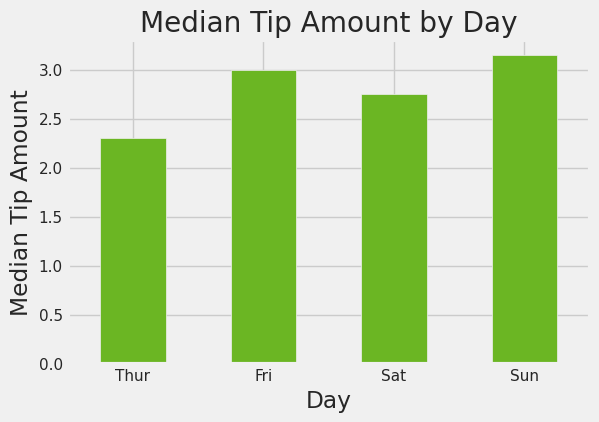

In [26]:
with plt.style.context('fivethirtyeight'):
  tips.groupby('day', observed=True)['tip'].median().plot(kind='bar',
                                          figsize=(6, 4), color='#6bb623')
  plt.xticks(rotation=0)
  plt.xlabel('Day')
  plt.ylabel('Median Tip Amount')
  plt.title('Median Tip Amount by Day');

## 3 — Skew, outliers, and simple transforms
- Compute skewness and kurtosis to detect heavy tails.  
- For right-skewed distributions, consider log1p (`np.log1p`) before modeling or plotting.


In [27]:
# Skewness and kurtosis
print("Skewness & kurtosis")
for col in ["total_bill", "tip"]:
    print(col, "skew:", tips[col].skew(), "kurtosis:", tips[col].kurtosis())

Skewness & kurtosis
total_bill skew: 1.1332130376158205 kurtosis: 1.2184840156638854
tip skew: 1.4654510370979401 kurtosis: 3.648375873352852


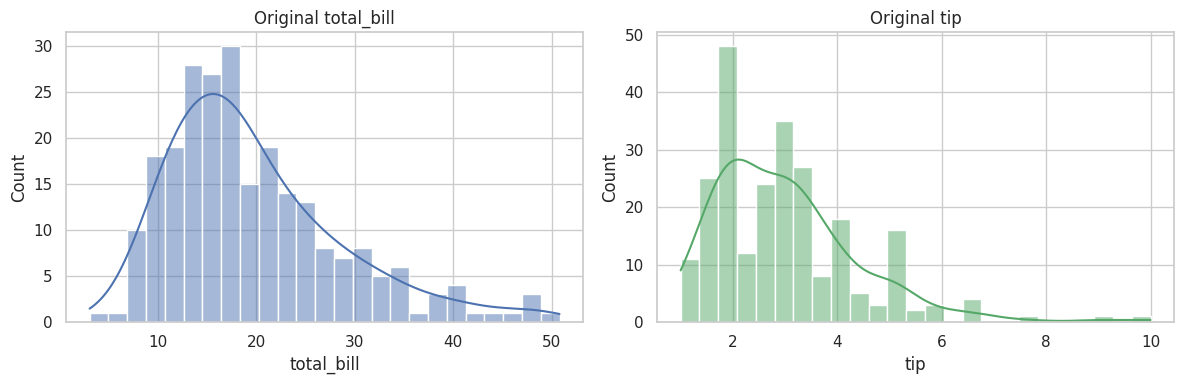

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(tips["total_bill"], bins=25, kde=True)
plt.title("Original total_bill")
plt.subplot(1,2,2)
sns.histplot(tips['tip'], bins=25, kde=True, color='C2')
plt.title("Original tip")
plt.tight_layout()

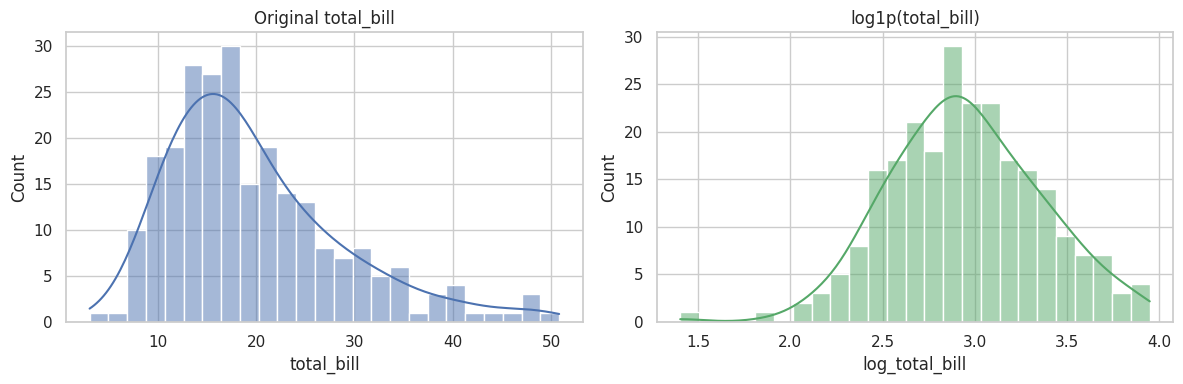

In [30]:
# Log transform demonstration and comparison plots
tips["log_total_bill"] = np.log1p(tips["total_bill"])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(tips["total_bill"], bins=25, kde=True)
plt.title("Original total_bill")
plt.subplot(1,2,2)
sns.histplot(tips["log_total_bill"], bins=25, kde=True, color='C2')
plt.title("log1p(total_bill)")
plt.tight_layout()
plt.show()

<Axes: xlabel='total_bill', ylabel='Count'>

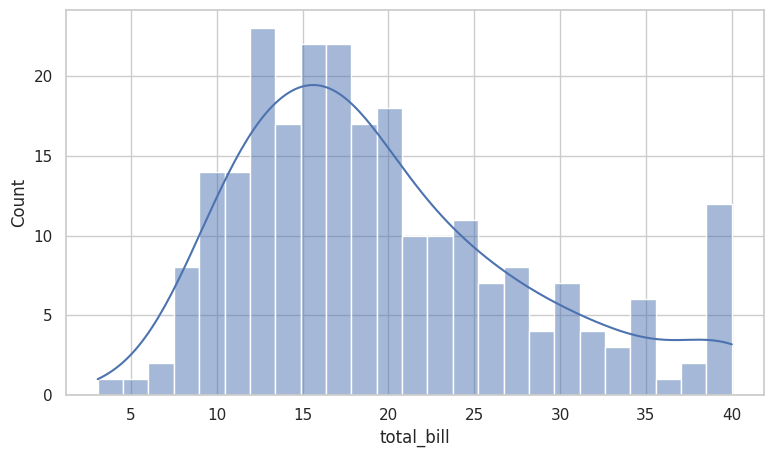

In [35]:
tips.loc[tips['total_bill'] > 40, 'total_bill'] = 40
sns.histplot(tips["total_bill"], bins=25, kde=True)

## 4 — Pairwise relationships and correlation
- Use scatterplots and regression fits for bivariate checks.  
- Use pairplot for small numeric sets.  
- Compute Pearson (linear) and Spearman (monotonic) correlations and visualize via heatmap.


In [44]:
# correlation bewtween tip and total bill by day of week
overall_corr = tips[['tip', 'total_bill']].corr().loc['tip', 'total_bill'].round(2)
print(f'Correlation between tip and total bill {overall_corr}')

for day in tips['day'].unique():
  corr_day = tips[tips['day'] == day][['tip', 'total_bill']].corr().loc['tip', 'total_bill'].round(2)
  print(f'Correlation between tip and total bill on {day} -  {corr_day}')

Correlation between tip and total bill 0.66
Correlation between tip and total bill on Sun -  0.51
Correlation between tip and total bill on Sat -  0.66
Correlation between tip and total bill on Thur -  0.82
Correlation between tip and total bill on Fri -  0.77


In [49]:
tips.loc[0, 'total_bill'] = 1500

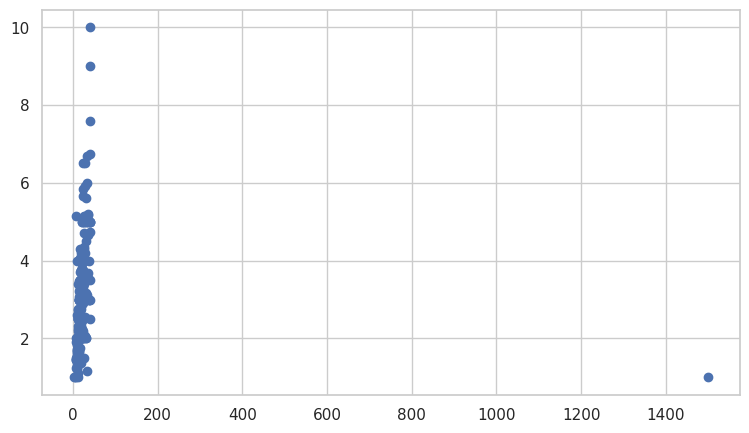

In [50]:
plt.scatter(tips['total_bill'], tips['tip'])

In [51]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.00,-0.03
tip,-0.03,1.00


<Axes: xlabel='total_bill', ylabel='tip'>

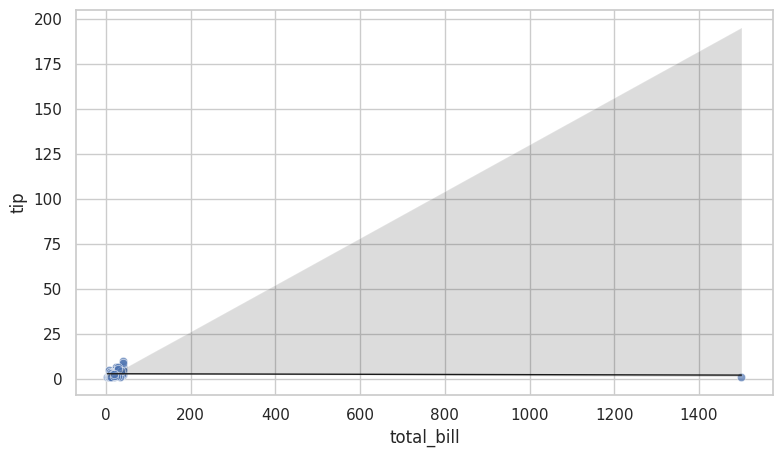

In [53]:
sns.scatterplot(data=tips, x="total_bill", y="tip", alpha=0.7)
sns.regplot(data=tips, x="total_bill", y="tip", scatter=False, color='k', line_kws={"linewidth":1})

In [56]:
tips.loc[0, 'total_bill'] = 16.99
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.00,0.66
tip,0.66,1.00


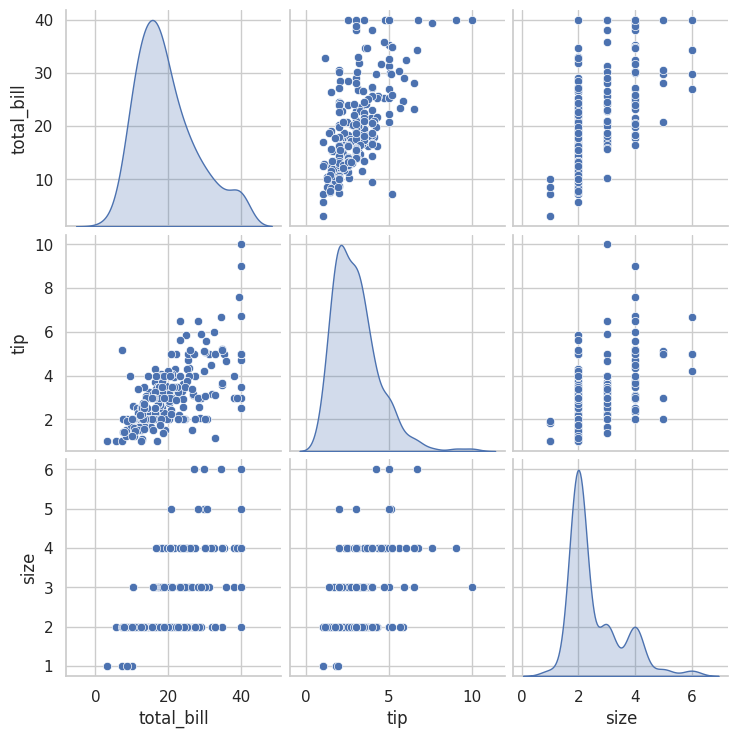

In [45]:
sns.pairplot(tips[["total_bill","tip","size"]], diag_kind="kde")

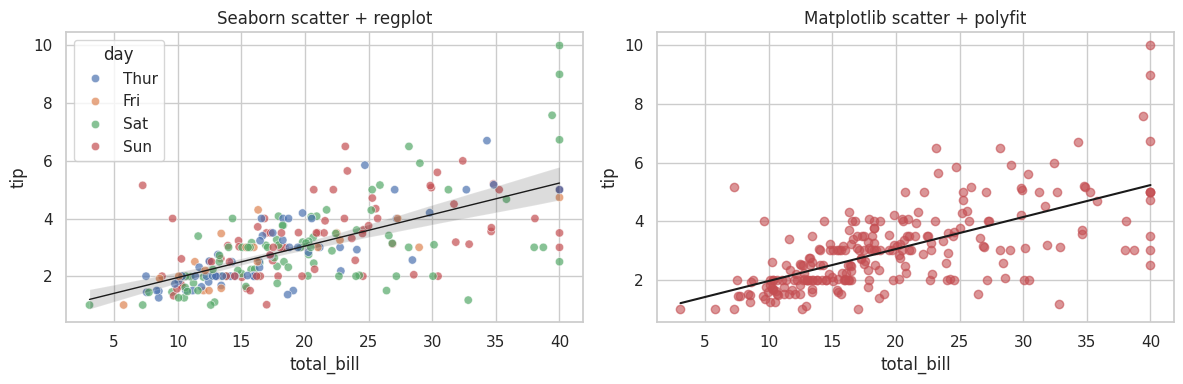

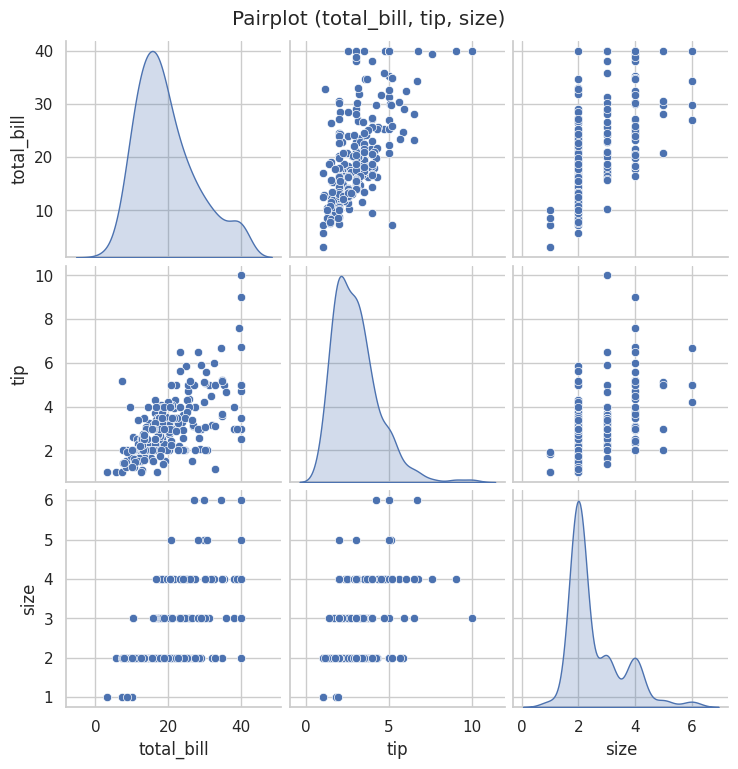

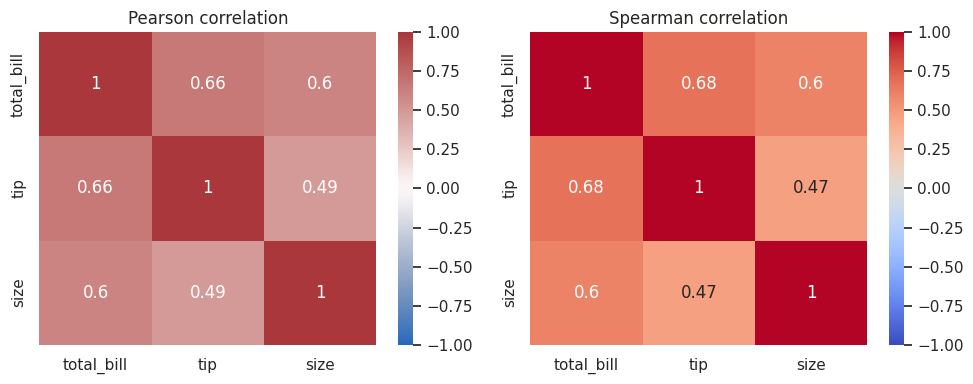

In [58]:
# Scatter + regression line (Seaborn and Matplotlib examples)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='day', alpha=0.7)
sns.regplot(data=tips, x="total_bill", y="tip", scatter=False, color='k', line_kws={"linewidth":1})
plt.title("Seaborn scatter + regplot")

plt.subplot(1,2,2)
# Matplotlib scatter + numpy polyfit line
x = tips['total_bill'].values
y = tips['tip'].values
plt.scatter(x, y, alpha=0.6, color='C3')
coef = np.polyfit(x, y, 1)
poly1d = np.poly1d(coef)
xs = np.linspace(x.min(), x.max(), 100)
plt.plot(xs, poly1d(xs), color='k', lw=1.5)
plt.title("Matplotlib scatter + polyfit")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.tight_layout()
plt.show()

# Pairplot (small numeric subset)
sns.pairplot(tips[["total_bill","tip","size"]], diag_kind="kde")
plt.suptitle("Pairplot (total_bill, tip, size)", y=1.02)
plt.show()

# Correlation heatmaps
num_cols = ["total_bill","tip","size"]
corr_pearson = tips[num_cols].corr(method="pearson")
corr_spearman = tips[num_cols].corr(method="spearman")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.title("Pearson correlation")

plt.subplot(1,2,2)
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman correlation")
plt.tight_layout()
plt.show()


In [62]:
tips['total_bill_squared'] = tips['total_bill'] ** 3
tips[['total_bill', 'total_bill_squared', 'tip']].corr()

,total_bill,total_bill_squared,tip
total_bill,1.00,0.93,0.66
total_bill_squared,0.93,1.00,0.60
tip,0.66,0.60,1.00


In [63]:
tips[['total_bill', 'total_bill_squared', 'tip']].corr(method='spearman')

,total_bill,total_bill_squared,tip
total_bill,1.00,1.00,0.68
total_bill_squared,1.00,1.00,0.68
tip,0.68,0.68,1.00


<Axes: xlabel='total_bill_squared', ylabel='tip'>

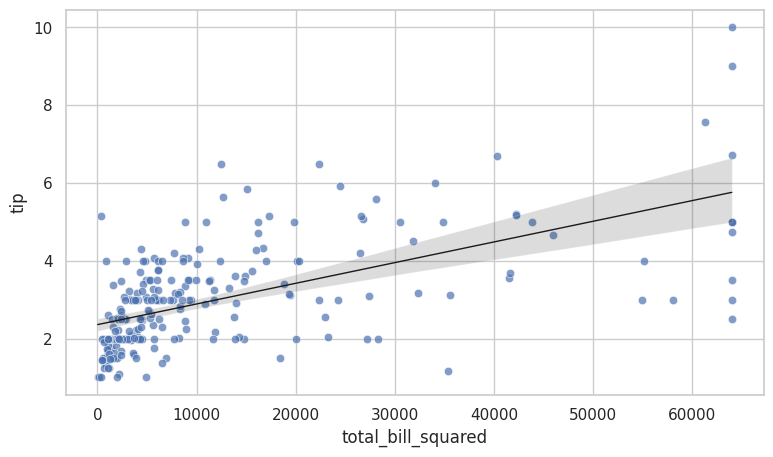

In [64]:
sns.scatterplot(data=tips, x="total_bill_squared", y="tip", alpha=0.7)
sns.regplot(data=tips, x="total_bill_squared", y="tip", scatter=False, color='k', line_kws={"linewidth":1})

## 5 — Groupby aggregation and plots
- Use `groupby(...).agg(...)` to compute aggregated summaries per category.  
- Pivot aggregated results to create heatmaps or bar charts for categorical comparisons.


In [66]:
# Groupby day & time
agg = tips.groupby(["day","time"], observed=True).agg(
    n = ("total_bill","count"),
    avg_bill = ("total_bill","mean"),
    avg_tip = ("tip","mean"),
).reset_index()
display(agg)

,day,time,n,avg_bill,avg_tip
0,Thur,Lunch,61,17.59,2.77
1,Thur,Dinner,1,18.78,3.00
2,Fri,Lunch,7,12.85,2.38
3,Fri,Dinner,12,19.65,2.94
4,Sat,Dinner,87,20.08,2.99
5,Sun,Dinner,76,21.22,3.26


In [73]:
# Pivot for average bill (heatmap)
pivot = agg.pivot(index="day", columns="time", values="avg_tip")
display(pivot)

time,Lunch,Dinner
day,,
Thur,2.77,3.00
Fri,2.38,2.94
Sat,NaN,2.99
Sun,NaN,3.26


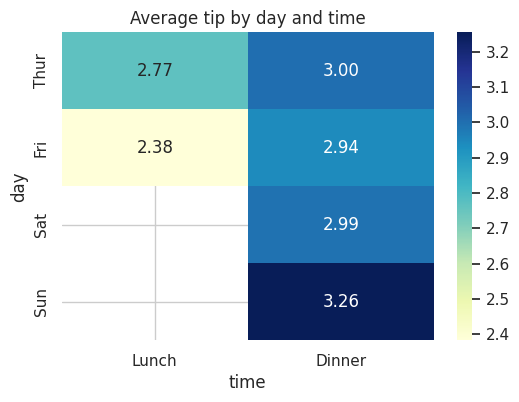

In [74]:
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average tip by day and time")
plt.show()

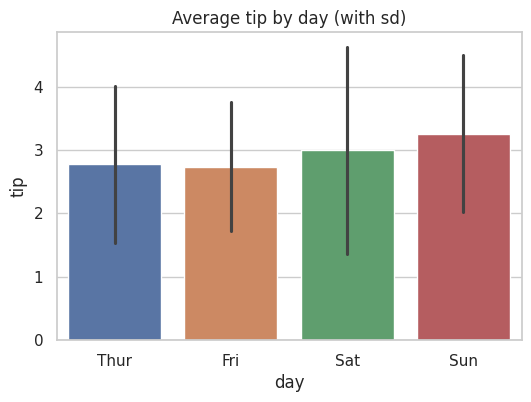

In [78]:
# Barplot: average tip by day
plt.figure(figsize=(6,4))
sns.barplot(data=tips, x="day", y="tip", errorbar='sd', hue='day')
plt.title("Average tip by day (with sd)")
plt.show()

In [79]:
tips.groupby('day')['tip'].describe()

/tmp/ipython-input-2567271825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip'].describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.00,2.77,1.24,1.25,2.00,2.30,3.36,6.70
Fri,19.00,2.73,1.02,1.00,1.96,3.00,3.37,4.73
Sat,87.00,2.99,1.63,1.00,2.00,2.75,3.37,10.00
Sun,76.00,3.26,1.23,1.01,2.04,3.15,4.00,6.50


## 6 — Missing values: detection and simple handling
- Report missing counts first.  
- For numeric: consider median imputation grouped by relevant category.  
- For categorical: fill with "missing" or mode; keep a flag column when imputing.


In [85]:
# Synthetic missingness demo: introduce ~5% NA in tip
tips_demo = tips.copy()
tips_demo.loc[tips_demo.sample(frac=0.05, random_state=1).index, "tip"] = np.nan
print("Missing counts before impute:\n", tips_demo.isna().sum())


# Impute tip with median per day
tips_demo["tip_imputed"] = tips_demo["tip"].fillna(tips_demo.groupby("day")["tip"].transform("median"))
tips_demo['tip_imputed_median'] = tips_demo['tip'].fillna(tips_demo['tip'].median())
print("\nMissing counts after group median impute:\n", tips_demo.isna().sum())

# Show rows where imputation happened
display(tips_demo[tips_demo["tip"].isna()][["day","tip_imputed"]])

Missing counts before impute:
 total_bill             0
tip                   12
sex                    0
smoker                 0
day                    0
time                   0
size                   0
log_total_bill         0
total_bill_squared     0
dtype: int64

Missing counts after group median impute:
 total_bill             0
tip                   12
sex                    0
smoker                 0
day                    0
time                   0
size                   0
log_total_bill         0
total_bill_squared     0
tip_imputed            0
tip_imputed_median     0
dtype: int64


/tmp/ipython-input-637675633.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_demo["tip_imputed"] = tips_demo["tip"].fillna(tips_demo.groupby("day")["tip"].transform("median"))


,day,tip_imputed
4,Sun,3.12
58,Sat,2.88
67,Sat,2.88
89,Thur,2.18
122,Thur,2.18
177,Sun,3.12
186,Sun,3.12
206,Sat,2.88
218,Sat,2.88
220,Fri,3.00


In [84]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,log_total_bill,total_bill_squared
0,16.99,1.01,Female,No,Sun,Dinner,2,2.89,"4,904.34"
1,10.34,1.66,Male,No,Sun,Dinner,3,2.43,"1,105.51"
2,21.01,3.50,Male,No,Sun,Dinner,3,3.09,"9,274.24"
3,23.68,3.31,Male,No,Sun,Dinner,2,3.21,"13,278.38"
4,24.59,3.61,Female,No,Sun,Dinner,4,3.24,"14,868.79"


In [95]:
tips_demo['tip'].value_counts().head(5)

,count
tip,
2.00,31
3.00,21
4.00,12
5.00,10
1.50,9


In [97]:
tips_demo[tips_demo['tip'] == 2.96]

,total_bill,tip,sex,smoker,day,time,size,log_total_bill,total_bill_squared,tip_imputed,tip_imputed_median


In [96]:
tips_demo['tip_imputed_median'].value_counts().head(5)

,count
tip_imputed_median,
2.00,31
3.00,21
2.96,12
4.00,12
5.00,10


In [92]:
tips_demo['tip'].isnull().sum()

np.int64(12)

In [94]:
tips_demo['tip'].median()

2.96

<Axes: xlabel='tip_imputed_median', ylabel='Count'>

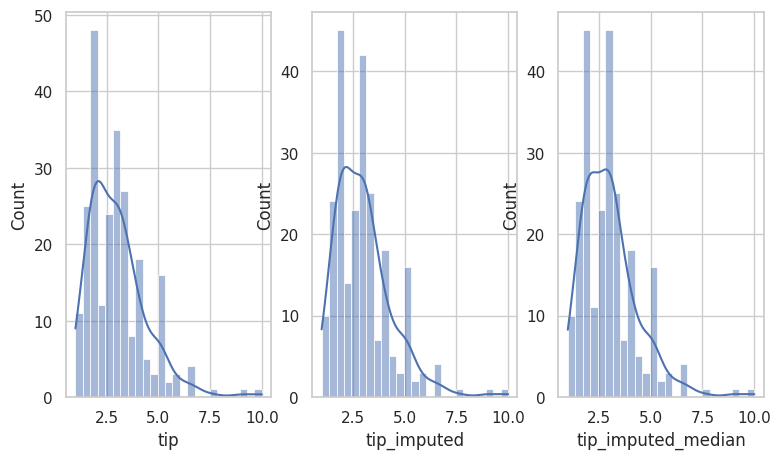

In [86]:
plt.subplot(1, 3, 1)
sns.histplot(tips["tip"], bins=25, kde=True)

plt.subplot(1, 3, 2)
sns.histplot(tips_demo["tip_imputed"], bins=25, kde=True)

plt.subplot(1, 3, 3)
sns.histplot(tips_demo["tip_imputed_median"], bins=25, kde=True)

## 7 — Mixing Seaborn and Matplotlib
- Seaborn returns Matplotlib axes; after a Seaborn call you can call Matplotlib to annotate, add lines, or adjust layout.
- Pattern: create Seaborn plot → assign to `ax` → call `ax.*` or `plt.*` to add customizations.
- Use this to combine Seaborn's convenience with Matplotlib's control.


In [99]:
mean_tip

np.float64(2.99827868852459)

In [108]:
tips['total_bill'].max()

40.0

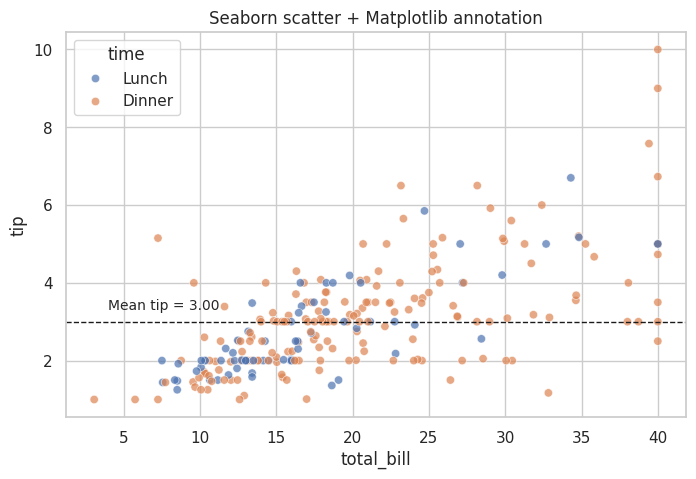

In [115]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', alpha=0.7)
mean_tip = tips['tip'].mean()
ax.axhline(mean_tip, color='k', linestyle='--', lw=1)
ax.text(tips['total_bill'].max()*0.1, mean_tip + .3, f"Mean tip = {mean_tip:.2f}", fontsize=10)
ax.set_title("Seaborn scatter + Matplotlib annotation")
plt.show()

## In-class activity
Task: produce three plots and one short observation paragraph:
1. Distribution plot (hist + KDE or box) for a numeric column.  
2. Scatterplot (with regression fit) for a pair of numeric columns.  
3. A grouped summary (bar, heatmap, or violin) showing a categorical comparison.  
Deliverable: three plots embedded in the notebook and a Markdown cell titled "Observation" with a 3–4 line insight.


In [116]:
titanic = pd.read_csv('https://raw.githubusercontent.com/VinayBN8997/Titanic-EDA/refs/heads/master/Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Text(0.5, 1.0, 'Distribution of Passenger Age')

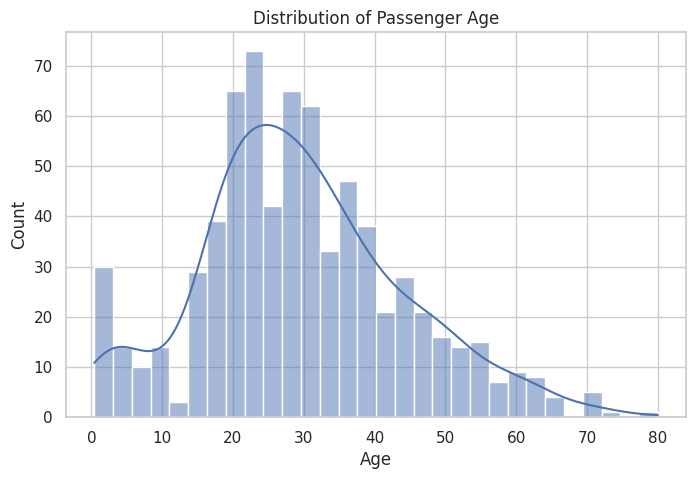

In [117]:
plt.figure(figsize=(8,5))
sns.histplot(data=titanic, x="Age", bins=30, kde=True)
plt.title("Distribution of Passenger Age")

In [119]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


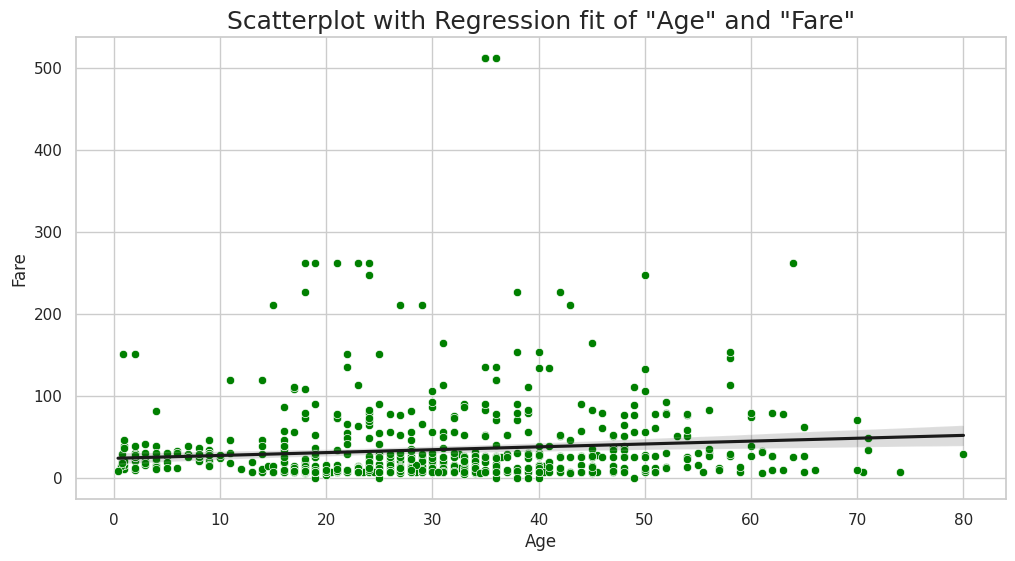

In [128]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=titanic, x='Age', y='Fare', color='green')
sns.regplot(data=titanic, x='Age', y='Fare', scatter=False, color='k')
           # line_kws={"linewidth":1, line_color:'black'})
sns
plt.title('Scatterplot with Regression fit of "Age" and "Fare"', fontsize=18)
plt.show()

In [130]:
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.00,0.10
Fare,0.10,1.00


<Axes: xlabel='Age', ylabel='Fare'>

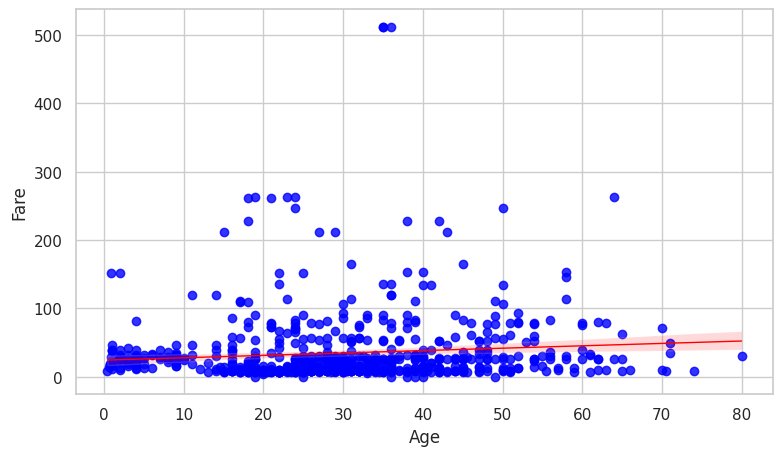

In [129]:
sns.regplot(
    data=titanic,
    x='Age',
    y='Fare',
    scatter=True,
    color='blue',
    line_kws={'color': 'red', 'linewidth': 1}   # regression line color
)

In [120]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.00,38.23,14.80,0.92,27.00,37.00,49.00,80.00
2,173.00,29.88,14.00,0.67,23.00,29.00,36.00,70.00
3,355.00,25.14,12.50,0.42,18.00,24.00,32.00,74.00


In [131]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

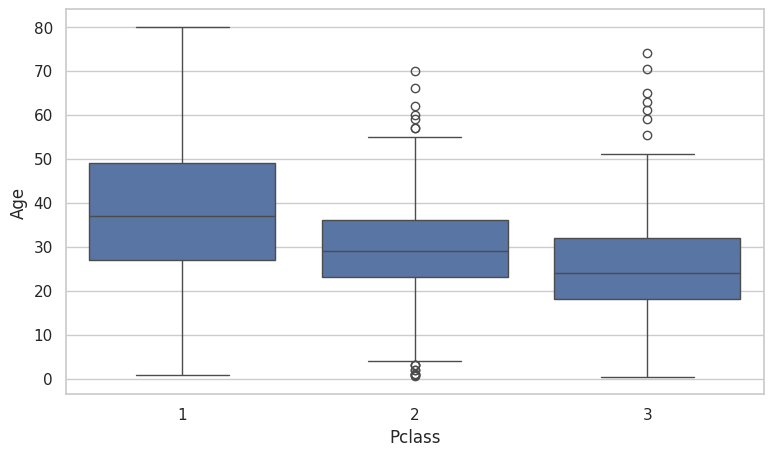

In [132]:
sns.boxplot(data=titanic, x='Pclass', y='Age')

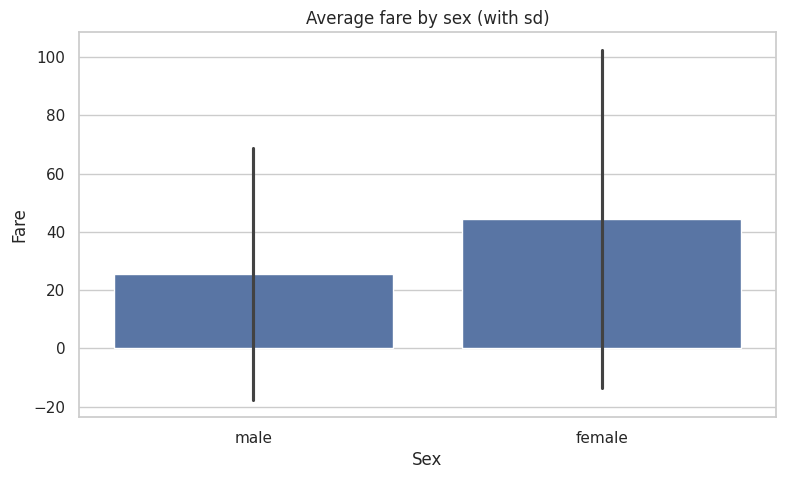

In [133]:
sns.barplot(data=titanic, x="Sex", y="Fare", errorbar='sd');
plt.title("Average fare by sex (with sd)")
plt.show()

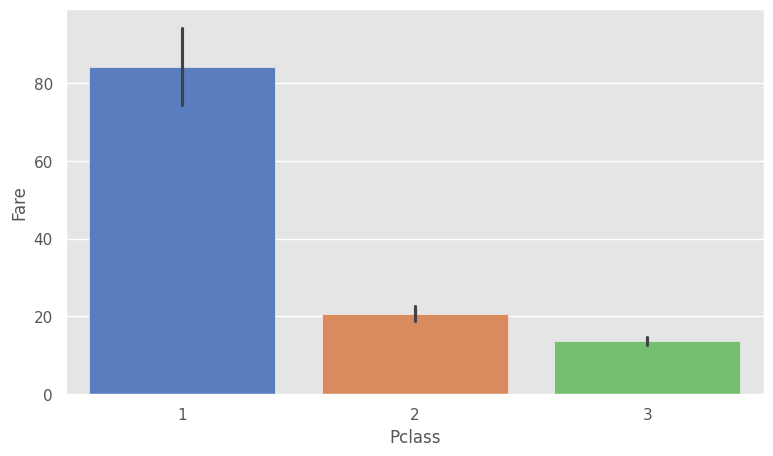

In [138]:
with plt.style.context('ggplot'):
  sns.barplot(data=titanic, x='Pclass', y='Fare',
              hue='Pclass', palette='muted', legend=False);